In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train[0].shape

(32, 32, 3)

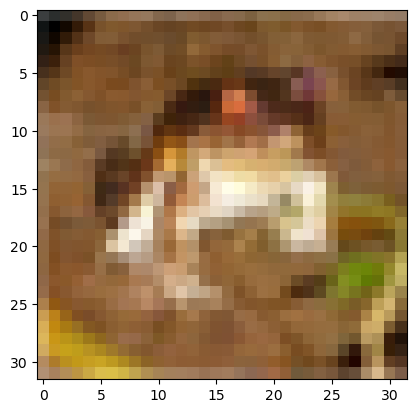

In [8]:
plt.imshow(x_train[0])

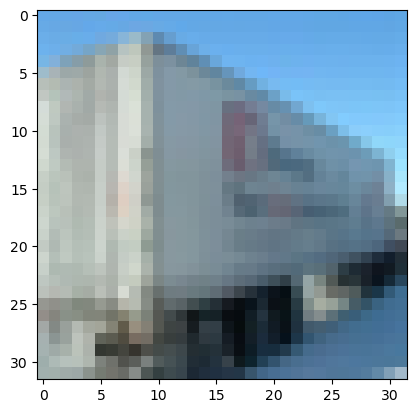

In [9]:
plt.imshow(x_train[15])

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train.shape

(50000, 1)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [15]:
y_cat_train .shape

(50000, 10)

In [16]:
y_cat_test.shape

(10000, 10)

In [17]:
print(y_cat_train[0], y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [6]


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

In [21]:
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [28]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3776 - accuracy: 0.8727 - val_loss: 1.3463 - val_accuracy: 0.6814
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3508 - accuracy: 0.8835 - val_loss: 1.4315 - val_accuracy: 0.6695
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3313 - accuracy: 0.8887 - val_loss: 1.6752 - val_accuracy: 0.6590
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3140 - accuracy: 0.8948 - val_loss: 1.7923 - val_accuracy: 0.6590


In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.377559,0.87274,1.346293,0.6814
1,0.350808,0.88348,1.431461,0.6695
2,0.331280,0.88872,1.675228,0.6590
3,0.314025,0.89484,1.792287,0.6590


<Axes: >

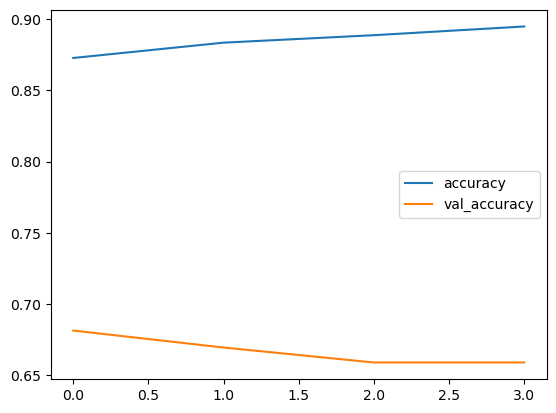

In [31]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

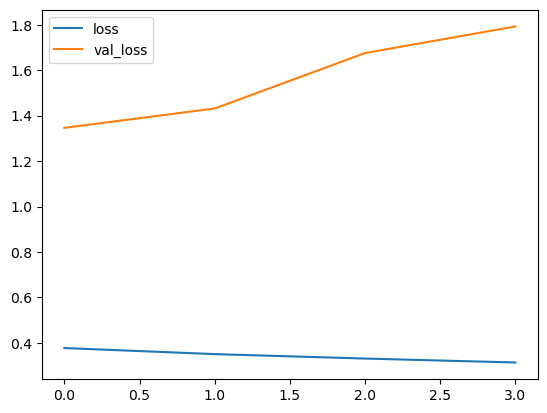

In [32]:
losses[['loss','val_loss']].plot()

In [40]:
[m.name for m in model.metrics]

['loss', 'accuracy']

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=1)
predictions

313/313 [==============================] - 1s 2ms/step


array([3, 1, 9, ..., 5, 1, 7], dtype=int64)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1000
           1       0.83      0.74      0.79      1000
           2       0.61      0.54      0.57      1000
           3       0.43      0.57      0.49      1000
           4       0.58      0.63      0.60      1000
           5       0.47      0.66      0.55      1000
           6       0.80      0.65      0.72      1000
           7       0.80      0.66      0.73      1000
           8       0.88      0.68      0.76      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[717,  23,  75,  43,  39,  19,   9,   8,  34,  33],
       [ 28, 744,  11,  22,   8,  16,  19,   3,  20, 129],
       [ 49,   5, 537,  99,  97, 138,  41,  16,   8,  10],
       [ 18,   4,  57, 566,  70, 221,  23,  23,   5,  13],
       [ 18,   1,  58, 108, 627,  98,  34,  48,   3,   5],
       [ 11,   1,  37, 189,  46, 661,  15,  32,   2,   6],
       [  7,   5,  42, 146,  69,  65, 648,   7,   5,   6],
       [ 15,   2,  26,  65,  77, 138,   3, 660,   0,  14],
       [101,  46,  31,  38,  29,  16,  12,   5, 675,  47],
       [ 43,  63,   8,  47,  11,  32,   5,  18,  18, 755]], dtype=int64)

<Axes: >

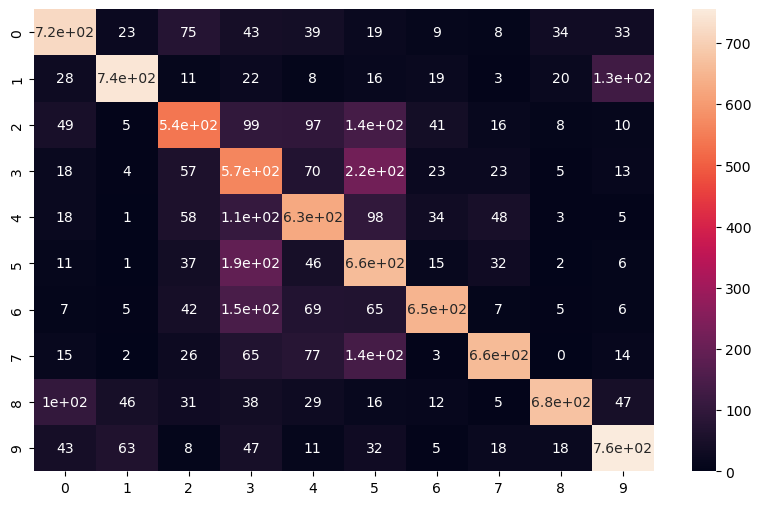

In [46]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [61]:
my_img = x_test[24]

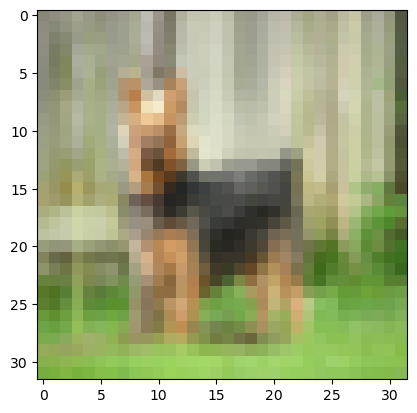

In [62]:
plt.imshow(my_img)

In [63]:
np.argmax(model.predict(my_img.reshape(1,32,32,3)), axis=1)

1/1 [==============================] - 0s 19ms/step


array([2], dtype=int64)